<a href="https://colab.research.google.com/github/mekilic7/Colab/blob/main/investing_us_cotton_no_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!pip install gdown
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 4.6 kB/s 


In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler

In [13]:
df_ = pd.read_csv('/content/investing_us_cotton_no_2.csv')

In [14]:
df_.info()
df_['Şimdi'] = df_['Şimdi'].str.replace(',','.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarih   3113 non-null   object
 1   Şimdi   3113 non-null   object
 2   Açılış  3113 non-null   object
 3   Yüksek  3113 non-null   object
 4   Düşük   3113 non-null   object
 5   Hac.    3113 non-null   object
 6   Fark %  3113 non-null   object
dtypes: object(7)
memory usage: 170.4+ KB


In [15]:
df_['Şimdi'] = df_['Şimdi'].astype(float, errors = 'raise')

In [16]:
df_.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,17.11.2021,118.30,"117,82","118,78","117,61",-,"0,46%"
1,16.11.2021,117.76,"117,78","118,34","117,11",-,"0,08%"
2,15.11.2021,117.67,"117,73","118,18","116,51",-,"0,06%"
3,12.11.2021,117.60,"118,62","118,91","116,67",-,"-0,84%"
4,11.11.2021,118.60,"118,89","119,19","117,58",-,"-0,13%"


In [17]:
df = df_[["Tarih","Şimdi"]]

In [18]:
df.head()

,Tarih,Şimdi
0,17.11.2021,118.30
1,16.11.2021,117.76
2,15.11.2021,117.67
3,12.11.2021,117.60
4,11.11.2021,118.60


In [19]:
df.columns = ["Date","Price"]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3113 non-null   object 
 1   Price   3113 non-null   float64
dtypes: float64(1), object(1)
memory usage: 48.8+ KB


In [42]:
df.head()

,Date,Price
0,17.11.2021,118.30
1,16.11.2021,117.76
2,15.11.2021,117.67
3,12.11.2021,117.60
4,11.11.2021,118.60


In [21]:
data = df.Price.values

In [22]:
data= data.reshape(-1, 1)


In [23]:
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
data = scaler.fit_transform(data)

In [25]:
data[:10]

array([[0.4209346 ],
       [0.41766168],
       [0.41711619],
       [0.41669192],
       [0.42275289],
       [0.42372265],
       [0.42523789],
       [0.41123704],
       [0.41335839],
       [0.41044912]])

In [26]:
timestep = 5
X = []
Y = []
for i in range(len(data)-(timestep)):
    X.append(data[i:i+timestep])
    Y.append(data[i+timestep])

In [27]:
len(data)

3113

In [28]:
X = np.asanyarray(X)
X = X.reshape((X.shape[0],X.shape[1],1))

In [29]:
len(Y)

3108

In [30]:
Y = np.asanyarray(Y)

In [31]:
k = int(0.7*len(Y))
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]

In [32]:
Ytrain = Y[:k]
Ytest = Y[k:]

In [98]:
from sklearn.model_selection import train_test_split
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, Y, test_size=0.30, random_state=42)

### Manuel seçilen train - test ###


In [33]:
model = Sequential()
model.add(LSTM(64,
               batch_input_shape=(None,timestep,1),     
               return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

In [34]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(Xtrain,
          Ytrain,
          batch_size=20,
          validation_data=(Xtest,Ytest),
          verbose=1,
          epochs=30,
          shuffle=False)

Plotting Results


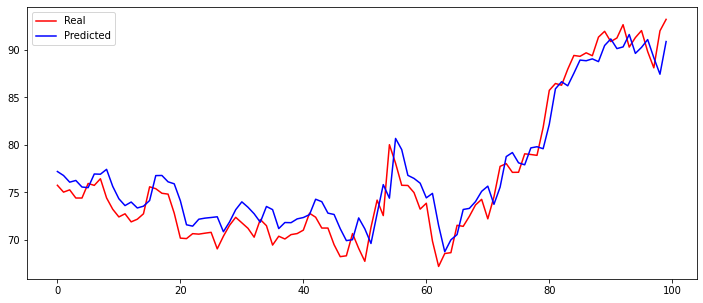

In [95]:
#rastgele başlangıc noktası seciliyor
# Başlangıç Noktasından veriler alınır ve sırayla tahminleri hesaplanır.
beg = random.randint(0,len(Ytest)-100)
selected_input = Xtest[beg:beg+100,:,:]
real_output = scaler.inverse_transform(Ytest[beg:beg+100])
predicted_output = model.predict(selected_input, batch_size=1)
predicted_output = scaler.inverse_transform(predicted_output)
# Sonuçlar Grafik halinde gösterilir.
print('Plotting Results')
plt.figure(figsize=(12,5))
xpos = range(len(predicted_output))
plt.plot(xpos,real_output,'r',xpos,predicted_output,'b')
plt.legend(('Real','Predicted'))
plt.savefig('out.jpg',dpi=400)
plt.show()





In [109]:
df_result = pd.DataFrame()
df_r1 = pd.DataFrame(real_output, columns = ['real'])
df_r2 = pd.DataFrame(predicted_output, columns = ['predicted'])
df_result['Gerçek'] = df_r1['real']
df_result['Tahmin'] = df_r2['predicted']
df_result

,Gerçek,Tahmin
0,81.29,81.176422
1,107.34,107.732834
2,83.18,82.541672
3,68.49,68.955856
4,62.20,63.956406
...,...,...
95,69.27,68.729965
96,58.18,60.004818
97,97.56,96.198265
98,63.53,64.021500


##Ratgele Secilen train test ##

In [ ]:
model.fit(X_train_rand,
          y_train_rand,
          batch_size=20,
          validation_data=(X_test_rand,y_test_rand),
          verbose=1,
          epochs=30,
          shuffle=False)



Plotting Results


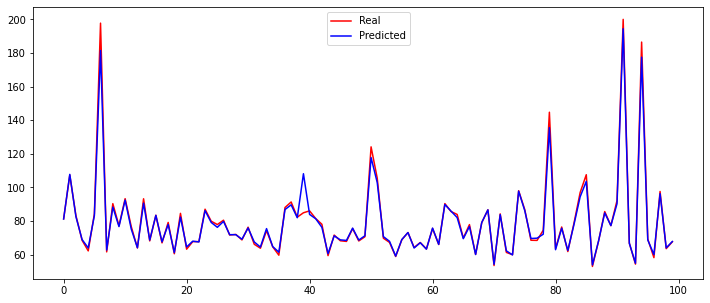

In [108]:
beg = random.randint(0,len(y_test_rand)-100)
selected_input = X_test_rand[beg:beg+100,:,:]
real_output = scaler.inverse_transform(y_test_rand[beg:beg+100])
predicted_output = model.predict(selected_input, batch_size=1)
predicted_output = scaler.inverse_transform(predicted_output)
# Sonuçlar Grafik halinde gösterilir.
print('Plotting Results')
plt.figure(figsize=(12,5))
xpos = range(len(predicted_output))
plt.plot(xpos,real_output,'r',xpos,predicted_output,'b')
plt.legend(('Real','Predicted'))
plt.savefig('out.jpg',dpi=400)
plt.show()

In [104]:
df_result = pd.DataFrame()
df_r1 = pd.DataFrame(real_output, columns = ['real'])
df_r2 = pd.DataFrame(predicted_output, columns = ['predicted'])
df_result['Gerçek'] = df_r1['real']
df_result['Tahmin'] = df_r2['predicted']
df_result

,Gerçek,Tahmin
0,63.83,63.803936
1,58.35,58.548008
2,79.20,77.411835
3,76.91,77.201744
4,59.75,60.917637
...,...,...
95,88.09,86.408745
96,73.86,73.031273
97,62.96,63.290325
98,62.29,63.926548
